<a href="https://colab.research.google.com/github/beercafeguy/PyMLLab/blob/master/DL_Day_3_HOML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

In [3]:
model = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(10, activation="softmax")
    ]
)

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 batch_normalization_2 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_3 (Bat  (None, 100)               4

In [10]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full),(X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [11]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0 # dividing by 255.0 to scale the image values to 0-1
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer="sgd", # optimizer=keras.optimiz ers.SGD(lr=<learning rate value>) default learning rate = 0.01
    metrics = ['accuracy']
)

In [14]:
history = model.fit(X_train,y_train, epochs = 30, validation_data = (X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 13s 6ms/step - loss: 0.5543 - accuracy: 0.8048 - val_loss: 0.4170 - val_accuracy: 0.8540
Epoch 2/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4260 - accuracy: 0.8477 - val_loss: 0.3766 - val_accuracy: 0.8650
Epoch 3/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3894 - accuracy: 0.8606 - val_loss: 0.3562 - val_accuracy: 0.8700
Epoch 4/30
1719/1719 [==============================] - 18s 10ms/step - loss: 0.3659 - accuracy: 0.8677 - val_loss: 0.3463 - val_accuracy: 0.8770
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3494 - accuracy: 0.8737 - val_loss: 0.3407 - val_accuracy: 0.8794
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3330 - accuracy: 0.8787 - val_loss: 0.3356 - val_accuracy: 0.8770
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3205 - accuracy: 0.8852 - val_loss: 0.3239 - val_a

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


history_pd = pd.DataFrame(history.history)
history_pd[1:5]

,loss,accuracy,val_loss,val_accuracy
1,0.425962,0.847691,0.376552,0.8650
2,0.389357,0.860618,0.356218,0.8700
3,0.365913,0.867745,0.346347,0.8770
4,0.349417,0.873673,0.340736,0.8794


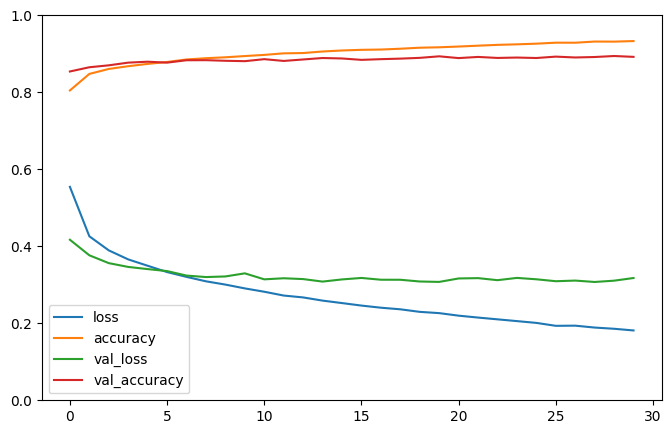

In [16]:
history_pd.plot(kind='line', figsize=(8, 5))
plt.grid=True
plt.gca().set_ylim(0,1)
plt.show()

In [7]:
[(var.name,var.trainable) for var in model.layers[1].variables]

[('batch_normalization_1/gamma:0', True),
 ('batch_normalization_1/beta:0', True),
 ('batch_normalization_1/moving_mean:0', False),
 ('batch_normalization_1/moving_variance:0', False)]

In [8]:
model.layers[1].updates

<ipython-input-8-11fe563bf3e2>:1: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  model.layers[1].updates


[]

In [9]:
# applying batchnorm before activation function
# as we see hidden layers does not have any activation function inbuilt here so
# batch norm is calculated before giving
model_bn_before_activation = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False), # removed bias because batch norm itself has an offset param which its is learning
        keras.layers.BatchNormalization(),
        keras.layers.Activation("elu"),
        keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("elu"),
        keras.layers.Dense(10, activation="softmax")
    ]
)

In [ ]:
# params to tune in mini batch
# momentum -> for updating exponential moving averages
# axis -> axis of calculating mean and std deviation in 2D and 3D objects
